## 1. 관심있는 주제 및 이유

#### 주제
손님 쇼핑 트렌드 데이터
https://www.kaggle.com/code/iamsouravbanerjee/shopping-trends-unveiled-eda-for-beginners

#### 이유
고객 데이터 분석을 통해 수익을 극대화하는 일을 해보고 싶기 때문에 골랐습니다.


## 2. 타이타닉 데이터 전처리

### 가설
#### 좌석 등급이 높을 수록 생존 확률이 높아진다.
#### 탑승지 별로 생존 확률 차이가 있다.


#### 데이터 불러오기

In [3]:
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns


Defaulting to user installation because normal site-packages is not writeable


C:\Users\mcdor\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Defaulting to user installation because normal site-packages is not writeable


In [6]:
data=pd.read_csv("C:/Users/mcdor/Desktop/비어플/Titanic-Dataset.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 도메인 분석(컬럼 분석)

survived 0=사망 1=생존
Pclass 1=1등석 2=2등석 3=3등석 
SibSp= 타이타닉에 같이 탄 자매 혹은 배우자의 수 
Parch= 타이타닉에 같이 탄 부모 혹은 자식의 수 
Fare=승객 요금 
Cabin=방 호수 
Embarked  탑승지 S=사우샘프턴 C=세르부르 Q=퀸즈타운

#### 데이터 카피

In [7]:
df=data.copy()

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 생존자 및 사망자 수 확인

In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### (1) 좌석 별 생존자 및 사망자 수 분석

In [9]:
first_survived = df.loc[df["Pclass"] == 1,"Survived"]
first_survived

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

In [10]:
first_survived.value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

In [11]:
second_survived = df.loc[df["Pclass"] == 2,"Survived"]
second_survived

9      1
15     1
17     1
20     0
21     1
      ..
866    1
874    1
880    1
883    0
886    0
Name: Survived, Length: 184, dtype: int64

In [12]:
second_survived.value_counts()

Survived
0    97
1    87
Name: count, dtype: int64

In [13]:
third_survived = df.loc[df["Pclass"] == 3,"Survived"]
third_survived

0      0
2      1
4      0
5      0
7      0
      ..
882    0
884    0
885    0
888    0
890    0
Name: Survived, Length: 491, dtype: int64

In [14]:
third_survived.value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

#### 좌석 등급 별 생존자 및 사망자 수 그래프

<Axes: xlabel='Pclass', ylabel='Survived'>

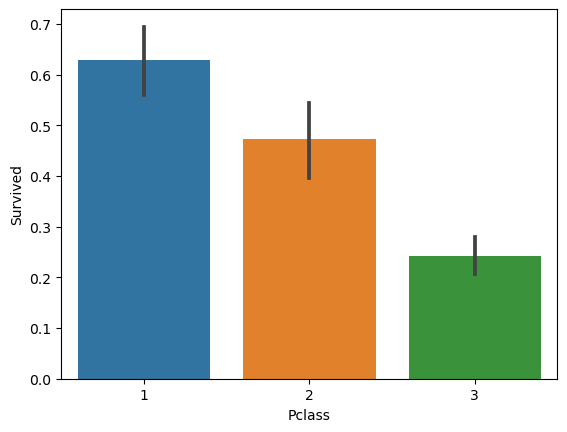

In [17]:
sns.barplot(x='Pclass',y='Survived',data=df)


#### 좌석 등급 별 생존자  비율
1등급 62.9%
2등급 47.2%
3등급 24.2%

#### 결론
좌석 등급이 높을 수록 생존 확률이 높아진다.

#### (2) 탑승지 별 생존자 및 사망자 수 분석

#### 사우샘프턴

In [44]:
s_survived = df.loc[df["Embarked"] == "S","Survived"]
s_survived.value_counts()


Survived
0    427
1    217
Name: count, dtype: int64

#### 퀸즈타운

In [46]:
q_survived = df.loc[df["Embarked"] == "Q","Survived"]
q_survived.value_counts()


Survived
0    47
1    30
Name: count, dtype: int64

#### 세르부르

In [47]:
c_survived = df.loc[df["Embarked"] == "C","Survived"]
c_survived.value_counts()


Survived
1    93
0    75
Name: count, dtype: int64

#### 탑승지 별 생존자 및 사망자 수 그래프


<Axes: xlabel='Embarked', ylabel='Survived'>

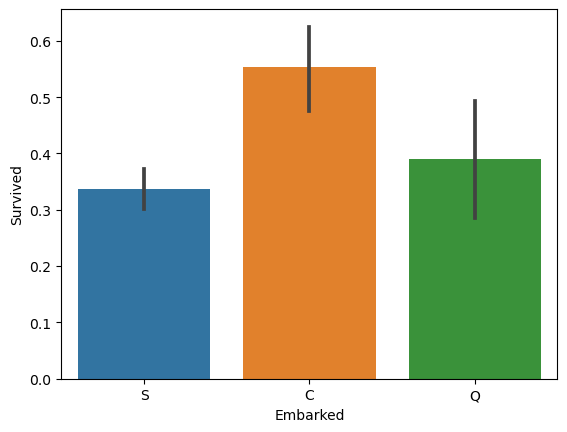

In [18]:
sns.barplot(x='Embarked',y='Survived',data=df)


#### 탑승지 등급 별 생존자  비율
사우샘프턴 33.6%
세르부르 55.3%
퀸즈타운 38.9%


#### 결론
세르부르에서 탑승할 경우 생존 확률이 가장 높지만 다른 지역과 엄청 큰 차이는 없다.